# Preprocessing the data 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv("../datasets/Task_1/car_price_prediction.csv")
df.head()

## Remove ID Column

In [ ]:
df.drop(columns=['ID'],inplace=True)
df.head()

## Manufacturer Mapping

In [ ]:
unique_manufacturer = df["Manufacturer"].unique()

# Use of AI:
# Why? -> new to python. Before mainly java (spring) and cpp
# Prompt: "in python i have a list of names which I want to put into a dictionary with an associated int value starting from 1 (so e.g. Ford - 1, Audi - 2 , Mercedes - 3 ,....)How do I do that"
# Result (with small adjustment):
manufacturer_result = {unique: i+1 for i, unique in enumerate(unique_manufacturer)}
print(manufacturer_result)

# Replace value in dataframe with according integer from the dictionary
df.replace(manufacturer_result,inplace=True)
df.head()

## Model Mapping

In [ ]:
unique_model = df["Model"].unique()
print(len(unique_model))
model_result = {unique: i+1 for i, unique in enumerate(unique_model)}
print(model_result)

df.replace(model_result,inplace=True)
df.head()

## Category Mapping

In [ ]:
unique_category = df["Category"].unique()
print(len(unique_category))
category_result = {unique: i+1 for i, unique in enumerate(unique_category)}
print(category_result)

df.replace(category_result,inplace=True)
df.head()

## Interior Boolean Mapping
1 = yes, 0 = no

In [ ]:
bool_mapping = {"Yes":1,"No":0}
df.replace(bool_mapping,inplace=True)
df.head()

## Fuel Type Mapping


In [ ]:
unique_fuel = df["Fuel type"].unique()
print(len(unique_fuel))
fuel_result = {unique: i+1 for i, unique in enumerate(unique_fuel)}
print(fuel_result)

df.replace(fuel_result,inplace=True)
df.head()

In [ ]:
df.describe()

Problem: column Engine Volume doesnt show up in df.describe() even though there should only be numeric values inside
Solution: Search for != Integers and delete rows / adjust data inside the cells

In [ ]:

# source: https://www.geeksforgeeks.org/python/check-for-nan-in-pandas-dataframe/
#print(df["Engine volume"].isnull().sum())
# => no Null values

#print(df["Engine volume"].dtypes)
#=> all object datatypes

#dataframe to numeric casten, everything else is gonna be NaN and remove them from the dataset
# source: docs https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
df["Engine volume"] = pd.to_numeric(df["Engine volume"],errors="coerce")
# result: ~1700 rows => too much for manual adjustment => remove rows 
df.dropna(how='any',axis=0,inplace=True)
df["Engine volume"].describe()



In [ ]:
df.head()

## Remove "km" suffix from Mileage column

In [ ]:
#this throws an error, now that it isnt an object anymore
#df["Mileage"] = df["Mileage"].str.replace(" km", "")

df.describe()
print(df["Mileage"].dtype)
#problem: column mileage still not getting detected as numeric
df["Mileage"] = pd.to_numeric(df["Mileage"],errors="coerce")
df.describe()

## Gear box type mapping

In [ ]:
unique_gear = df["Gear box type"].unique()
print(len(unique_gear))
gear_result = {unique: i+1 for i, unique in enumerate(unique_gear)}
print(gear_result)

df.replace(gear_result,inplace=True)
df.head()

## Drive Wheels Mapping

In [ ]:
unique_wheels = df["Drive wheels"].unique()
print(len(unique_wheels))
wheels_result = {unique: i+1 for i, unique in enumerate(unique_wheels)}
print(wheels_result)

df.replace(wheels_result,inplace=True)
df.head()

## Doors Mapping

In [ ]:
unique_doors = df["Doors"].unique()
print(len(unique_doors))
doors_result = {unique: i+1 for i, unique in enumerate(unique_doors)}
print(doors_result)

df.replace(doors_result,inplace=True)
df.head()

## Wheel Mapping

In [ ]:
unique_wheel = df["Wheel"].unique()
print(len(unique_wheel))
wheel_result = {unique: i+1 for i, unique in enumerate(unique_wheel)}
print(wheel_result)

df.replace(wheel_result,inplace=True)
df.head()

## Color Mapping

In [ ]:
unique_color = df["Color"].unique()
print(len(unique_color))
color_result = {unique: i+1 for i, unique in enumerate(unique_color)}
print(color_result)

df.replace(color_result,inplace=True)
df.head()

In [ ]:
df.to_csv("../datasets/Task_1/result.csv")
# save dataframe to new csv file

## Process Levy so its getting used

In [ ]:
df = pd.read_csv("../datasets/Task_1/1.csv")
levy_mapping = {"-":0}
df.replace(levy_mapping,inplace=True)
df.head()

In [ ]:
# cast to numeric, replace non numeric with empty cells 
df["Levy"] = pd.to_numeric(df["Levy"],errors="coerce")
df["Levy"].dtype
df.describe()

In [ ]:
print(len(df.columns))
print(df.columns)
# column without name is getting added after saving (edit: apparently it adds a comma at the first position which leads to a column getting recognized)
df.drop(columns=["Unnamed: 0"],inplace=True)
df.to_csv("../datasets/Task_1/2.csv")

## Remove Outliers

In [ ]:
df = pd.read_csv("../datasets/Task_1/2.csv")
df.head()

Find outliers using plots:
src: docs https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html

In [ ]:
# find price outliers:
df["Price"].plot()
df["Price"].describe()

sorted_df = df.sort_values(by='Price', ascending=False)
print(sorted_df.head())
# => 15266  26307500     0             8    207        1999         5   huge outlier with 26Million$ => manually remove it from the csv

In [ ]:
# Find Levy Outliers
df["Levy"].plot()
df["Levy"].describe()

sorted_df = df.sort_values(by='Levy', ascending=False)
print(sorted_df.head())
# 102    11917  11714             7     68        2003         3   
#17076  11917  11714             7    306        2003         3   
#17050  14740  11706             7   1583        2005         3   
# 3 outliers manually removed

## Remove Column Color

In [ ]:
df = pd.read_csv("../datasets/Task_1/manipulation/2.csv")
df.head()

In [ ]:
df.drop(columns=["Color"],inplace=True)
df.head()
df.to_csv("../datasets/Task_1/3.csv")

## Remove Column Doors

In [ ]:
df = pd.read_csv("..datasets/Task_1/3.csv")
df.head()

In [ ]:
df.drop(columns=["Doors"],axis=1,inplace=True)
df.head()

In [ ]:
df.to_csv("../datasets/Task_1/4.csv")

## Remove Column Wheel

In [ ]:
df = pd.read_csv("../datasets/Task_1/4.csv")
df.head()

In [ ]:
df.drop(columns=["Wheel"],axis=1,inplace=True)
df.head()

In [ ]:
df.to_csv("../datasets/Task_1/5.csv")

## Remove Column Leather Interior

In [ ]:
df = pd.read_csv("../datasets/Task_1/5.csv")
df.head()

In [ ]:
df.drop(columns=["Leather interior"],axis=1,inplace=True)
df.head()

In [ ]:
df.to_csv("../datasets/Task_1/6.csv")

## Remove Price Outliers with very small Price 


       Price  Levy  Manufacturer  Model  Prod. year  Category  Fuel type  \
14863     20     0            15    128        2005         2          2   
11381     20     0             3      3        2005         2          2   
15371     20     0             3      3        2003         2          2   
2443      20     0            15    320        2005         2          2   
2770      20     0             6      6        2008         2          1   

       Engine volume  Mileage  Cylinders  Gear box type  Drive wheels  Airbags  
14863            1.5   146000        4.0              1             2        7  
11381            1.3   187000        4.0              1             2        4  
15371            1.3   157000        4.0              1             2        4  
2443             1.5   136000        5.0              1             2        6  
2770             1.5   135000        4.0              1             2        4  


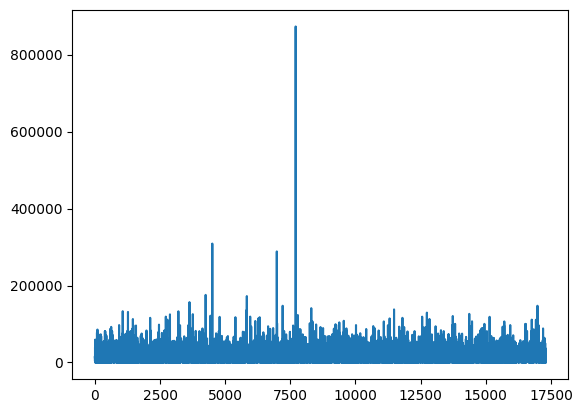

In [9]:
df = pd.read_csv("../datasets/Task_1/6.csv")
# find very small price outliers:
df["Price"].plot()
df["Price"].describe()

sorted_df = df.sort_values(by='Price', ascending=True)
print(sorted_df.head())